In [1]:
import sys
sys.path.append('./../../3D_Gen/')
from Encoder.dataEmbedding.dataEmbedding import Read_Load_BuildBatch

import pandas as pd
import numpy as np
from tqdm import tqdm
from torch.utils.data import DataLoader
from Models.Generator import Generator32_Small

import torch
import trimesh
from trimesh import voxel
from functools import partial
import ssl
import os
import pickle

from config import cfg
import torch.optim as optim
import nrrd
import random
from Script.scripts import augment_voxel_tensor,sample_z,vizualizer_stanford_data,evaluateShape,vizualizer_stanford_data,loadOneElem,evalTestSet
import point_cloud_utils as pcu


Trening

In [8]:
with open(os.path.join(getattr(cfg,"GAN_INFO_DATA"),'GAN_data.pkl'), 'rb') as pickle_file:
    tmp0=pickle.load(pickle_file)

EOFError: Ran out of input

In [ ]:
with open(os.path.join(getattr(cfg,"GAN_INFO_DATA"),'GAN_data8_9.pkl'), 'rb') as pickle_file:
    tmp2=pickle.load(pickle_file)

FileNotFoundError: [Errno 2] No such file or directory: './../InfoData/GAN_data8_9.pkl'

In [19]:
len(tmp2['val_gen_loss'])

24

In [14]:
infoData={'train_gen_loss':[],
          'train_crit_loss':[],
          'val_gen_loss':[],
          'val_crit_loss':[]
          }

In [37]:
infoData['train_crit_loss'].append(sum(tmp2['train_disc_loss'][:1800])/len(tmp2['train_disc_loss'][:1800]))
infoData['train_gen_loss'].append(sum(tmp2['train_gen_loss'][:1800])/len(tmp2['train_gen_loss'][:1800]))
infoData['val_crit_loss'].append(tmp2['val_disc_loss'][11])
infoData['val_gen_loss'].append(tmp2['val_gen_loss'][11])

infoData['train_crit_loss'].append(sum(tmp2['train_disc_loss'][1800:])/len(tmp2['train_disc_loss'][1800:]))
infoData['train_gen_loss'].append(sum(tmp2['train_gen_loss'][1800:])/len(tmp2['train_gen_loss'][1800:]))
infoData['val_crit_loss'].append(tmp2['val_disc_loss'][23])
infoData['val_gen_loss'].append(tmp2['val_gen_loss'][23])

In [5]:
with open(os.path.join(getattr(cfg,"GAN_INFO_DATA"),'GAN_data.pkl'), 'wb') as pickle_file:
    pickle.dump(infoData,pickle_file)

NameError: name 'infoData' is not defined

In [4]:
from matplotlib.pylab import plt
from numpy import arange


epochs = range(0, len(infoData['train_gen_loss']))
 
plt.plot(range(0,len(infoData['train_gen_loss'])), infoData['train_gen_loss'], label='Generator Loss')
plt.plot(range(0,len(infoData['train_gen_loss'])), infoData['train_crit_loss'], label='Critic Loss')
 
# Add in a title and axes labels
plt.title('Training cWGAN Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
 
# Set the tick locations
plt.xticks(arange(0, len(infoData['train_gen_loss']), 1))
 
# Display the plot
plt.legend(loc='best')
plt.show()

NameError: name 'infoData' is not defined

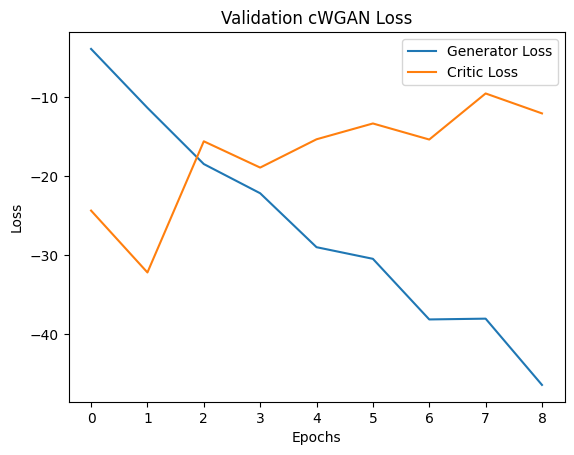

In [42]:
epochs = range(0, len(infoData['train_gen_loss']))
 
plt.plot(range(0,len(infoData['val_gen_loss'])), infoData['val_gen_loss'], label='Generator Loss')
plt.plot(range(0,len(infoData['val_crit_loss'])), infoData['val_crit_loss'], label='Critic Loss')
 
# Add in a title and axes labels
plt.title('Validation cWGAN Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
 
# Set the tick locations
plt.xticks(arange(0, len(infoData['train_gen_loss']), 1))
 
# Display the plot
plt.legend(loc='best')
plt.show()

Testy

In [2]:
with open(getattr(cfg,"GAN_TEST_SPLIT"), 'rb') as pickle_file:
    tmp=pickle.load(pickle_file)

In [3]:

device=cfg.DEVICE
#print(device)
PYTORCH_ENABLE_MPS_FALLBACK=1
#for mac os fix 
ssl._create_default_https_context = ssl._create_unverified_context

torch.manual_seed(cfg.SEED)
np.random.seed(cfg.SEED)

generator=Generator32_Small()
generator.load_state_dict(torch.load(os.path.join('./../SavedModels',"generator_model.pth"),map_location=torch.device('cpu')))
generator=generator.to(cfg.DEVICE)
generator.eval()

Generator32_Small(
  (fc1): Sequential(
    (0): Linear(in_features=160, out_features=8192, bias=True)
    (1): BatchNorm1d(8192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): Sequential(
    (0): ConvTranspose3d(128, 128, kernel_size=(4, 4, 4), stride=(2, 2, 2), padding=(1, 1, 1))
    (1): BatchNorm3d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv4): Sequential(
    (0): ConvTranspose3d(128, 64, kernel_size=(4, 4, 4), stride=(2, 2, 2), padding=(1, 1, 1))
    (1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv5): Sequential(
    (0): ConvTranspose3d(64, 1, kernel_size=(4, 4, 4), stride=(2, 2, 2), padding=(1, 1, 1))
  )
)

In [4]:
met=evalTestSet(tmp,generator)

 66%|██████▋   | 4940/7452 [02:16<01:06, 38.00it/s]

In [ ]:
with open('./../GANexp.pkl', 'wb') as pickle_file:
    pickle.dump(met,pickle_file)

Vizualization

In [42]:
idx=random.randint(0,len(tmp))
k=loadOneElem(idx,tmp)
p=generator(k[1].unsqueeze(0))
p=p['sigmoid_output'].squeeze(0).detach()

it be a table this shape be rectangle and color be coffee color


In [ ]:
vizualizer_stanford_data(p.cpu(),'fake')

In [ ]:
vizualizer_stanford_data(k[2],'true')